<a href="https://colab.research.google.com/github/charu11/Neural-Networks-from-Scratch/blob/NNFS/Neural_networks_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# ***Single Neuron***

In [ ]:
inputs = [1,2,3]
weights = [0.2, 0.3, 0.4]
bias = 2

output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] + bias)

print(output)

4.0


# ***Layer of neurons***

In [ ]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
    # Neuron 1
    inputs[0] * weights1[0] +
    inputs[1] * weights1[1] +
    inputs[2] * weights1[2] +
    inputs[3] * weights1[3] + bias1 , 

    # Neuron 2
    inputs[0] * weights2[0] +
    inputs[1] * weights2[1] +
    inputs[2] * weights2[2] +
    inputs[3] * weights2[3] + bias2,

    inputs[0] * weights3[0] +
    inputs[1] * weights3[1] +
    inputs[2] * weights3[2] +
    inputs[3] * weights3[3] + bias3        
]


print(outputs)

[4.8, 1.21, 2.385]


*More Effcient way to calculate the output*

In [ ]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
# Output of current layer
outputs = []
# For each neuron

for neuron_weight, neuron_bias in zip(weights, biases):
  # Zeroed output of given neuron
  neuron_output = 0

  # For each input and weight to the neuron
  for n_input, weight in zip(inputs, neuron_weight):
    # Multiply this input by associated weight
    # and add to the neuron’s output variable
    neuron_output += n_input* weight

  # Add bias
  neuron_output += neuron_bias
  outputs.append(neuron_output)


print(outputs)


[4.8, 1.21, 2.385]


# ***Tensors, arrays, Vectors***

Tensors are closely-related to arrays. If you interchange tensor/array/matrix when it comes to
machine learning, people probably won’t give you too hard of a time. But there are subtle
differences, and they are primarily either the context or attributes of the tensor object. To
understand a tensor, let’s compare and describe some of the other data containers in Python
(things that hold data). Let’s start with a list. A Python list is defined by comma-separated
objects contained in brackets. So far, we’ve been using lists.


In [ ]:
list1 = [1,2,3,4]

list2 = [[1,5,6,2],
          [3,2,1,3]]

list3 =  [[[1,5,6,2],
          [3,2,1,3]],
          [[5,2,1,2],
          [6,4,8,4]],
          [[2,8,5,3],
          [1,1,9,4]]]


# above all the list can be an array because those are homologous( A list of lists is
#       homologous if each list along a dimension is identically long, and this must be true for each dimension).  


list4 = [[1,2,3,4],
         [5,6]]   # This can not be an array



***Matrix***

A matrix is pretty simple. It’s a rectangular array. It has columns and rows. It is two dimensional.
So a matrix can be an array (a 2D array). Can all arrays be matrices? No. An array can be far
more than just columns and rows, as it could have four dimensions, twenty dimensions, and so on.

In [ ]:
list_matrix_array = [[4,2],
                      [5,1],
                      [8,2]]

# the shape of this matrix is (3 * 2)




like in the list3, It has more than 2 dimenstions. 

The first level of this array contains 3 matrices: 




[[1,5,6,2],
[3,2,1,3]]

[[5,2,1,2],
[6,4,8,4]]

And

[[2,8,5,3],
[1,1,9,4]]


That’s what’s inside the most outer brackets and the size of this dimension is then 3. If we look at
the first matrix, we can see that it contains 2 lists — [1,5,6,2] and [3,2,1,3] so the size of
this dimension is 2 — while each list of this inner matrix includes 4 elements. These 4 elements
make up the 3rd and last dimension of this matrix since there are no more inner brackets.
Therefore, the shape of this array is (3, 2, 4) and it’s a 3-dimensional array, since the shape
contains 3 dimensions.

# Tensor

A tensor object is an object that can be represented as an array.
What this means is, as programmers, we can (and will) treat tensors as arrays in the context of
deep learning, and that’s really all the thought we have to put into it. Are all tensors just arrays?
No, but they are represented as arrays in our code, so, to us, they’re only arrays, and this is why
there’s so much argument and confusion.

# *Dot Product*

In [ ]:
a = [0,1,2]
b = [3,4,5]

dot_product = a[0] * b[0] + a[1] * b[1] + a[2] * b[2] 

print(dot_product)

14


# ***Single Neuron with Numpy***

In [ ]:
import numpy as np

In [ ]:
inputs = [1,2,3]
weights = [0.2, 0.3, 0.4]
bias = 2


outputs = np.dot(weights, inputs) + bias

print(outputs)

4.0


# ***A Layer of Neurons with Numpy***

In [ ]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]


layer_output = np.dot(weights, inputs) + biases

print(layer_output)

[4.8   1.21  2.385]


# A Batch of data

Often, neural networks expect to take in many samples at a time for two reasons. One reason
is that it’s faster to train in batches in parallel processing, and the other reason is that batches

help with generalization during training. If you fit (perform a step of a training process) on one
sample at a time, you’re highly likely to keep fitting to that individual sample, rather than
slowly producing general tweaks to weights and biases that fit the entire dataset. Fitting or
training in batches gives you a higher chance of making more meaningful changes to weights
and biases

# Matrix Product

The matrix product is an operation in which we have 2 matrices, and we are performing dot
products of all combinations of rows from the first matrix and the columns of the 2nd matrix,
resulting in a matrix of those atomic dot products:

***To perform a matrix product, the size of the second dimension of the left matrix must match the
size of the first dimension of the right matrix. For example, if the left matrix has a shape of (5, 4)
then the right matrix must match this 4 within the first shape value (4, 7). The shape of the
resulting array is always the first dimension of the left array and the second dimension of the right
array***

# **Transpose for the matrix product**

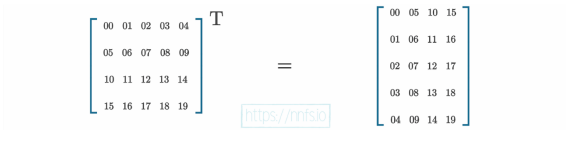

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Neural Networks from Scratch/transposition matrix.PNG')

This is an example for the matrix transpose.

In [6]:
a = [1,2,3,4]
b = [5,6,7,6]

a = np.array([a])
b = np.array([b]).T

In [7]:
np.dot(a, b)

array([[62]])

# **A Layers of Neurons & Batch of Data**

we need to the dot product of inputs and weights in order to get the product between those 2. so those have to be done using the matrices products. 
following example shows the input and weights lists. both are (3, 4) matrices,

In [9]:
inputs = [[1.3,2.1,3.0,4.6], 
          [2.3,5.6,-1.9,4.8], 
          [-1.5, 2.7, 5.4, 3.3]]

weights = [[0.2, 0.4, 0.8, 1.0],
           [.7, -0.4, -0.1, 0.6], 
           [2.1, 1.1, 0.2, -1.1]]   

bias = [2.0, 1.0, 0.5]                  

To do the dot product on matrix row count of first matrix should be equal to the column count of the second matrix. but above the size is same which is (3,4)
this is why we need Transpose to get the multiplication done

In [10]:
outputs = np.dot(inputs, np.array(weights).T) + bias

In [11]:
outputs

array([[10.1 ,  3.53,  1.08],
       [ 7.98,  3.44,  5.83],
       [10.4 ,  0.31, -2.23]])

# **Adding Layers**